# Android App Review Sentiment Analysis Code

In [2]:
# Import Necessary Libraries
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\25887246\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\25887246\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\25887246\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# Function to Load Train and Test Dataset

In [4]:
# Function to load dataset from txt file
def load_dataset_from_txt(input_txt_file):
    reviews = []
    labels = []
    app_ids = []
    with open(input_txt_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            fields = line.strip().split('\t')
            labels.append(int(fields[0]))
            app_ids.append(fields[1])
            reviews.append(fields[2])
    return reviews, labels, app_ids

# Function to Preprocess Train and Test Dataset

In [5]:
# Function for data preprocessing
def preprocess_dataset(dataset):
    preprocessed_dataset = []
    for review in dataset:
        review = review.lower()
        review = re.sub(r'http\S+|www\S+', '', review)
        review = review.translate(str.maketrans('', '', string.punctuation))
        review = re.sub(r'\d+', '', review)
        tokens = review.split()
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        preprocessed_review = ' '.join(tokens)
        preprocessed_dataset.append(preprocessed_review)
    return preprocessed_dataset

## Load the train and Test Dataset

In [6]:
# Load training datasets
train_file = 'reviews_Apps_for_Android_5.training.txt'
train_reviews, train_labels, train_app_ids = load_dataset_from_txt(train_file)

print("Training Dataset:")
for i in range(len(train_reviews)):
    print(f"Label: {train_labels[i]}")
    print(f"App ID: {train_app_ids[i]}")
    print(f"Review: {train_reviews[i]}")
    print("---")

Training Dataset:
Label: 2
App ID: B004A9SDD8
Review: Loves the song, so he really couldn't wait to play this. A little less interesting for him so he doesn't play long, but he is almost 3 and likes to play the older games, but really cute for a younger child.
---
Label: 3
App ID: B004A9SDD8
Review: Oh, how my little grandson loves this app. He's always asking for "Monkey." Grandma has tired of it long before he has. Finding the items on each page that he can touch and activate is endlessly entertaining for him, at least for now. Well worth the $.99.
---
Label: 3
App ID: B004A9SDD8
Review: I found this at a perfect time since my daughter's favorite song at the moment is five little monkeys. It's easy for little ones to operate and fun with all the things you can play with. The different generes are nice too, gives its a little variety.  Worth the money. Highly recommended!
---
Label: 3
App ID: B004A9SDD8
Review: My 1 year old goes back to this game over and over again.  It is simple bu

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
# Load test datasets
test_file = 'reviews_Apps_for_Android_5.test.txt'
test_reviews, test_labels, test_app_ids = load_dataset_from_txt(test_file)

print("Test Dataset:")
for i in range(len(test_reviews)):
    print(f"Label: {test_labels[i]}")
    print(f"App ID: {test_app_ids[i]}")
    print(f"Review: {test_reviews[i]}")
    print("---")

Test Dataset:
Label: 3
App ID: B004K4RY9M
Review: I am a person who has always enjoyed word game and thiis one  is excellent. After a hard day, I can unwind with it.
---
Label: 3
App ID: B004K4RY9M
Review: Love this.  I try to beat my own time to see how fast I can complete.  Keeps your mind working.
---
Label: 3
App ID: B004K4RY9M
Review: This game is fun and it can also be alearning game.  I recomend for ages 7 and up. This is a good focus game for all ages.
---
Label: 3
App ID: B004K4RY9M
Review: I enjoy these puzzles have books of them keep you entertained for hours. great game and it is unlimited!!! o
---
Label: 3
App ID: B004K4RY9M
Review: Have spent many enjoyable hours playing this game and would recomment it to others. This game helps to keep my mind sharp.
---
Label: 3
App ID: B004K4RY9M
Review: I love scrabble and word games and this is a nice quiet game when you need to play without calling attention to yourself.
---
Label: 3
App ID: B004K4RY9M
Review: This game occupies my

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Preprocess the Training and Testing Dataset

In [8]:
# Preprocess the training dataset
preprocessed_train_reviews = preprocess_dataset(train_reviews)

# Print the preprocessed training dataset
print("Preprocessed Training Dataset:")
for i in range(len(preprocessed_train_reviews)):
    print(f"Label: {train_labels[i]}")
    print(f"App ID: {train_app_ids[i]}")
    print(f"Preprocessed Train Review: {preprocessed_train_reviews[i]}")
    print("---")

Preprocessed Training Dataset:
Label: 2
App ID: B004A9SDD8
Preprocessed Train Review: love song really couldnt wait play little le interesting doesnt play long almost like play older game really cute younger child
---
Label: 3
App ID: B004A9SDD8
Preprocessed Train Review: oh little grandson love app he always asking monkey grandma tired long finding item page touch activate endlessly entertaining least well worth
---
Label: 3
App ID: B004A9SDD8
Preprocessed Train Review: found perfect time since daughter favorite song moment five little monkey easy little one operate fun thing play different generes nice give little variety worth money highly recommended
---
Label: 3
App ID: B004A9SDD8
Preprocessed Train Review: year old go back game simple easy toddler use ive even caught year old playing well good app little guy
---
Label: 3
App ID: B004A9SDD8
Preprocessed Train Review: three different version song game keep occupied everything click something airplane fly around room telephone ring 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
# Preprocess the test dataset
preprocessed_test_reviews = preprocess_dataset(test_reviews)

# Print the preprocessed test dataset
print("Preprocessed Test Dataset:")
for i in range(len(preprocessed_test_reviews)):
    print(f"Label: {test_labels[i]}")
    print(f"App ID: {test_app_ids[i]}")
    print(f"Preprocessed Test Review: {preprocessed_test_reviews[i]}")
    print("---")

Preprocessed Test Dataset:
Label: 3
App ID: B004K4RY9M
Preprocessed Test Review: person always enjoyed word game thiis one excellent hard day unwind
---
Label: 3
App ID: B004K4RY9M
Preprocessed Test Review: love try beat time see fast complete keep mind working
---
Label: 3
App ID: B004K4RY9M
Preprocessed Test Review: game fun also alearning game recomend age good focus game age
---
Label: 3
App ID: B004K4RY9M
Preprocessed Test Review: enjoy puzzle book keep entertained hour great game unlimited
---
Label: 3
App ID: B004K4RY9M
Preprocessed Test Review: spent many enjoyable hour playing game would recomment others game help keep mind sharp
---
Label: 3
App ID: B004K4RY9M
Preprocessed Test Review: love scrabble word game nice quiet game need play without calling attention
---
Label: 3
App ID: B004K4RY9M
Preprocessed Test Review: game occupies time need take breather reading book may game tire quickly
---
Label: 3
App ID: B004K4RY9M
Preprocessed Test Review: enjoy game overall initially d

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Preprocessing Pipelines (Steps) 

C:\Users\25887246\AppData\Local\Temp\ipykernel_11844\2150998919.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


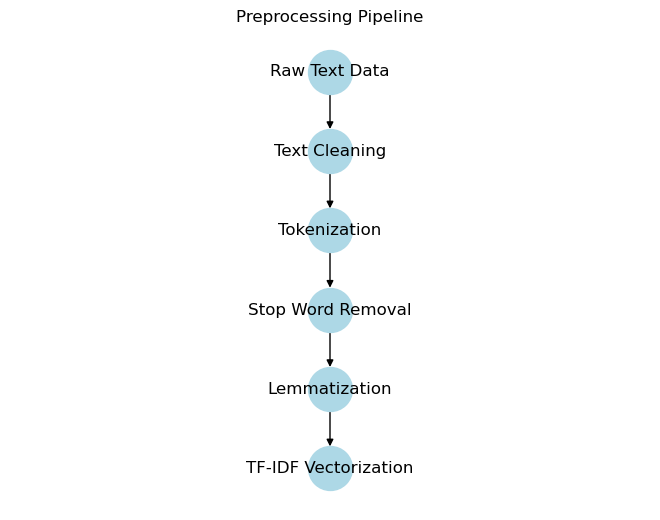

In [10]:
# Details of the Preprocessing techniques (Preprocessing Pipelines)
def create_preprocessing_flowchart():
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes to the graph
    G.add_node("Raw Text Data", pos=(0, 0))
    G.add_node("Text Cleaning", pos=(0, -1))
    G.add_node("Tokenization", pos=(0, -2))
    G.add_node("Stop Word Removal", pos=(0, -3))
    G.add_node("Lemmatization", pos=(0, -4))
    G.add_node("TF-IDF Vectorization", pos=(0, -5))

    # Add edges to the graph
    G.add_edge("Raw Text Data", "Text Cleaning")
    G.add_edge("Text Cleaning", "Tokenization")
    G.add_edge("Tokenization", "Stop Word Removal")
    G.add_edge("Stop Word Removal", "Lemmatization")
    G.add_edge("Lemmatization", "TF-IDF Vectorization")

    # Draw the flowchart
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, arrows=True)

    # Add a title to the flowchart
    plt.title("Preprocessing Pipeline")

    # Show the flowchart
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function to create and display the flowchart
create_preprocessing_flowchart()

## Feature Extraction

In [11]:
# Convert preprocessed reviews to feature vectors using TF-IDF
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(preprocessed_train_reviews)
test_features = vectorizer.transform(preprocessed_test_reviews)

# Model Deployment

### Support Vector Machine

In [12]:
# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(train_features, train_labels)

SVC(kernel='linear')

In [13]:
# Make predictions on the test set
svm_predictions = svm_model.predict(test_features)

In [14]:
# Evaluate the model
svm_accuracy = accuracy_score(test_labels, svm_predictions)
svm_precision = precision_score(test_labels, svm_predictions, average='weighted')
svm_recall = recall_score(test_labels, svm_predictions, average='weighted')
svm_f1 = f1_score(test_labels, svm_predictions, average='weighted')

In [15]:
# Print the Evaluation Metrics
print("Classification Report:")
print(classification_report(test_labels, svm_predictions))
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1-score: {svm_f1:.2f}")

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.54      0.60      3469
           2       0.50      0.12      0.19      2087
           3       0.83      0.96      0.89     14443

    accuracy                           0.80     19999
   macro avg       0.67      0.54      0.56     19999
weighted avg       0.77      0.80      0.76     19999

Accuracy: 0.80
Precision: 0.77
Recall: 0.80
F1-score: 0.76


### K-Nearest Neighbor

In [16]:
# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(train_features, train_labels)

KNeighborsClassifier(n_neighbors=10)

In [17]:
# Make predictions on the test set
knn_predictions = knn_model.predict(test_features)

In [18]:
# Evaluate the model
knn_accuracy = accuracy_score(test_labels, knn_predictions)
knn_precision = precision_score(test_labels, knn_predictions, average='weighted')
knn_recall = recall_score(test_labels, knn_predictions, average='weighted')
knn_f1 = f1_score(test_labels, knn_predictions, average='weighted')

In [19]:
# Print the Evaluation Metrics
print("Classification Report:")
print(classification_report(test_labels, knn_predictions))
print(f"Accuracy: {knn_accuracy:.2f}")
print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1-score: {knn_f1:.2f}")

Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.33      0.42      3469
           2       0.27      0.07      0.11      2087
           3       0.78      0.95      0.86     14443

    accuracy                           0.75     19999
   macro avg       0.55      0.45      0.46     19999
weighted avg       0.70      0.75      0.70     19999

Accuracy: 0.75
Precision: 0.70
Recall: 0.75
F1-score: 0.70


### Visual Representation (Bar Chart) of the Evaluation Metrics

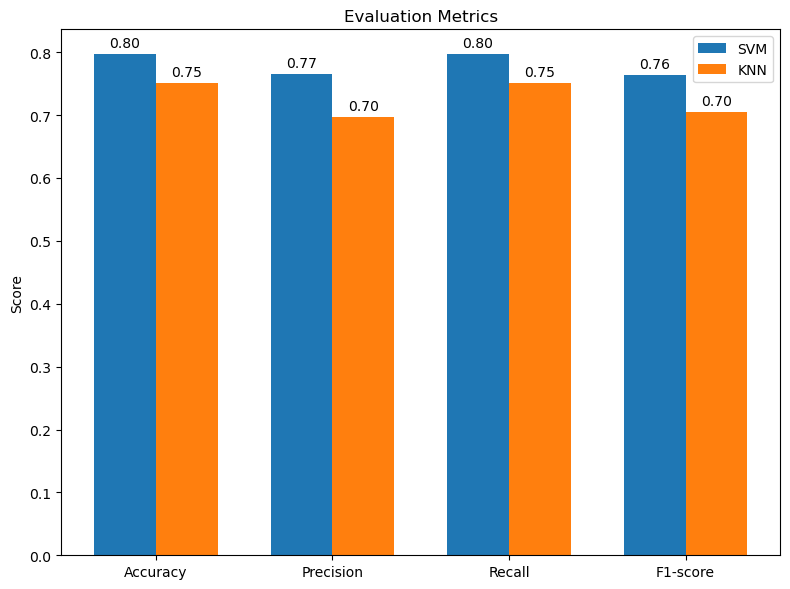

In [20]:
# Create lists of evaluation metrics for SVM and KNN models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]

# Set the width of each bar and the positions of the bars on the x-axis
bar_width = 0.35
x = range(len(metrics))

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
svm_bars = ax.bar([i - bar_width/2 for i in x], svm_scores, width=bar_width, label='SVM')
knn_bars = ax.bar([i + bar_width/2 for i in x], knn_scores, width=bar_width, label='KNN')

# Add labels and title
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display the values on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(svm_bars)
autolabel(knn_bars)

# Adjust the layout and display the chart
plt.tight_layout()
plt.show()

### Best Performing Model

In [21]:
# Determine the best-performing model
if svm_f1 > knn_f1:
    best_model = svm_model
    best_model_name = "SVM"
else:
    best_model = knn_model
    best_model_name = "KNN"

print(f"\nBest-performing model: {best_model_name}")


Best-performing model: SVM


### Determining the Most Successful Android Application Company using SVM

In [22]:
# Define the Android Application codes for each AAD company
aad_companies = {
    'AAD_1': ['B004NWLM8K', 'B004Q1NH4U', 'B004LPBTAA'],
    'AAD_2': ['B0046NAOU', 'B004R6HTWU', 'B004N8KDNY'],
    'AAD_3': ['B004KA0RBS', 'B004NPELDA', 'B004L26XXQ']
}

In [23]:
# Calculate the sentiment scores for each AAD company using the best-performing model
aad_sentiment_scores = {}

for company, app_codes in aad_companies.items():
    company_reviews = [test_reviews[i] for i in range(len(test_app_ids)) if test_app_ids[i] in app_codes]
    company_predictions = best_model.predict(vectorizer.transform(company_reviews))
    
    positive_count = sum(prediction == 3 for prediction in company_predictions)
    negative_count = sum(prediction == 1 for prediction in company_predictions)
    neutral_count = sum(prediction == 2 for prediction in company_predictions)
    
    total_reviews = len(company_reviews)
    positive_percentage = (positive_count / total_reviews) * 100
    negative_percentage = (negative_count / total_reviews) * 100
    neutral_percentage = (neutral_count / total_reviews) * 100
    
    aad_sentiment_scores[company] = {
        'positive_percentage': positive_percentage,
        'negative_percentage': negative_percentage,
        'neutral_percentage': neutral_percentage
    }

In [24]:
# Calculate the weighted sentiment score for each AAD company
aad_weighted_scores = {}

for company, scores in aad_sentiment_scores.items():
    positive_weight = 1.0
    negative_weight = -1.0
    neutral_weight = 0.0
    
    weighted_score = (
        scores['positive_percentage'] * positive_weight +
        scores['negative_percentage'] * negative_weight +
        scores['neutral_percentage'] * neutral_weight
    )
    
    aad_weighted_scores[company] = weighted_score


print("\nSentiment Analysis Results:")
for company, scores in aad_sentiment_scores.items():
    print(f"Company: {company}")
    print(f"Positive Percentage: {scores['positive_percentage']:.2f}%")
    print(f"Negative Percentage: {scores['negative_percentage']:.2f}%")
    print(f"Neutral Percentage: {scores['neutral_percentage']:.2f}%")
    print(f"Weighted Sentiment Score: {aad_weighted_scores[company]:.2f}")
    print()


Sentiment Analysis Results:
Company: AAD_1
Positive Percentage: 98.13%
Negative Percentage: 1.87%
Neutral Percentage: 0.00%
Weighted Sentiment Score: 96.26

Company: AAD_2
Positive Percentage: 74.31%
Negative Percentage: 22.94%
Neutral Percentage: 2.75%
Weighted Sentiment Score: 51.38

Company: AAD_3
Positive Percentage: 65.48%
Negative Percentage: 32.74%
Neutral Percentage: 1.79%
Weighted Sentiment Score: 32.74



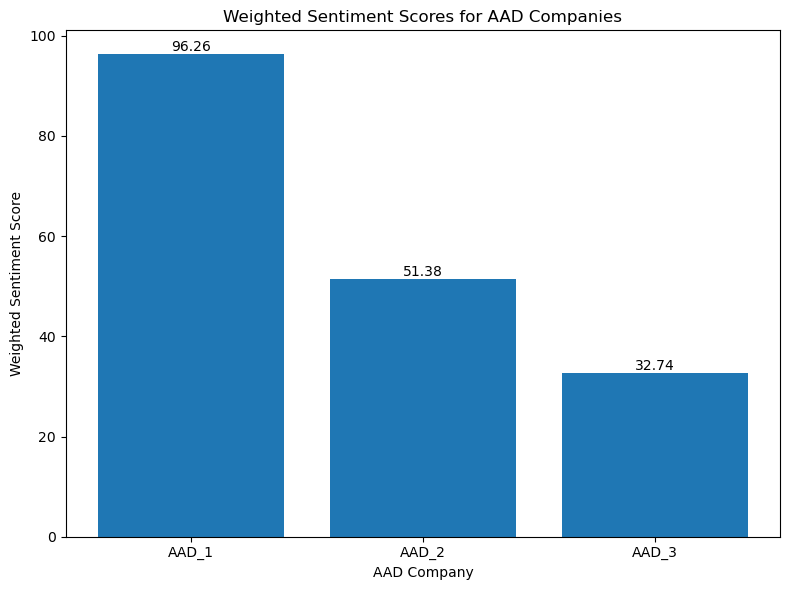

In [25]:
# Create a bar chart for weighted sentiment scores
companies = list(aad_weighted_scores.keys())
scores = list(aad_weighted_scores.values())

plt.figure(figsize=(8, 6))
plt.bar(companies, scores)
plt.xlabel('AAD Company')
plt.ylabel('Weighted Sentiment Score')
plt.title('Weighted Sentiment Scores for AAD Companies')

for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')
# Save the plot with tight layout to remove excess white space
plt.savefig('weighted', bbox_inches='tight')
plt.tight_layout()
plt.show()

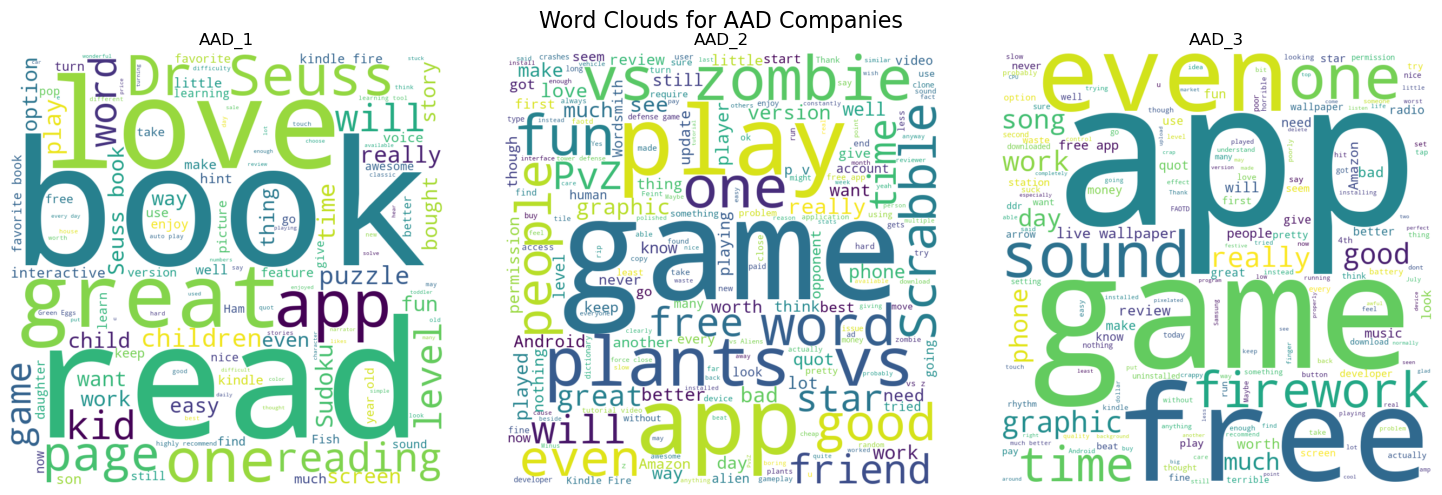

In [33]:
# Generate word clouds for each AAD company
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Word Clouds for AAD Companies', fontsize=16)

for i, (company, app_codes) in enumerate(aad_companies.items()):
    company_reviews = [test_reviews[j] for j in range(len(test_app_ids)) if test_app_ids[j] in app_codes]
    company_reviews_text = ' '.join(company_reviews)
    
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate(company_reviews_text)
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].axis('off')
    axs[i].set_title(company)

plt.tight_layout()
plt.show()

In [26]:
# Find the most successful AAD company based on the highest weighted sentiment score
most_successful_company = max(aad_weighted_scores, key=aad_weighted_scores.get)

print(f"Most Successful AAD Company: {most_successful_company}")

Most Successful AAD Company: AAD_1
